#  제4장

In [1]:
import numpy as np
import pandas as pd
import FinanceDataReader as fdr      # FinanceDataReader

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import font_manager, rc
import matplotlib.dates as mdates

###한글 폰트###
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
rcParams['axes.unicode_minus'] = False

In [3]:
df = fdr.DataReader('005930', '2010-01-01')  # KODEX200 지수를 2010년 1월1일부터 현재까지 수집
df.head(3)                                   # 데이터 출력

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2010-01-04,16060,16180,16000,16180,239271,0.012516
2010-01-05,16520,16580,16300,16440,559219,0.016069
2010-01-06,16580,16820,16520,16820,459755,0.023114


In [4]:
df.set_index('Date', inplace=True)

KeyError: "None of ['Date'] are in the columns"

In [5]:
df.index = pd.to_datetime(df.index)

In [6]:
r  = (df['Close'].pct_change())*100

In [7]:
r

Date
2010-01-04         NaN
2010-01-05    1.606922
2010-01-06    2.311436
2010-01-07   -3.329370
2010-01-08    0.984010
                ...   
2023-02-07    0.487013
2023-02-08    1.938611
2023-02-09   -0.158479
2023-02-10   -0.317460
2023-02-13   -0.318471
Name: Close, Length: 3237, dtype: float64

In [8]:
r.index

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2023-01-31', '2023-02-01', '2023-02-02', '2023-02-03',
               '2023-02-06', '2023-02-07', '2023-02-08', '2023-02-09',
               '2023-02-10', '2023-02-13'],
              dtype='datetime64[ns]', name='Date', length=3237, freq=None)

In [9]:
r.values

array([        nan,  1.60692213,  2.31143552, ..., -0.15847861,
       -0.31746032, -0.31847134])

In [10]:
r.describe()

count    3236.000000
mean        0.056029
std         1.688150
min        -8.035714
25%        -0.977100
50%         0.000000
75%         0.989695
max        10.470588
Name: Close, dtype: float64

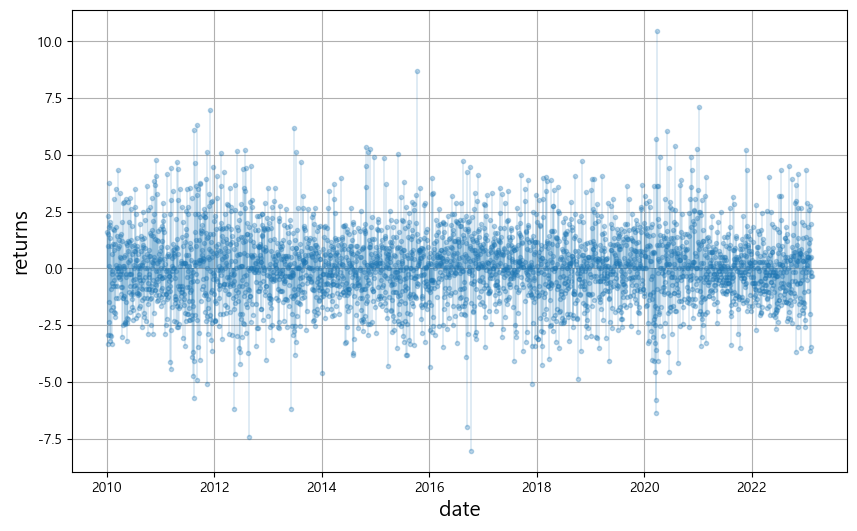

In [11]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(r, linestyle='', marker='o', alpha=0.3, ms=3) 
ax.vlines(r.index, 0, r.values, lw=0.2)
ax.set_ylabel('returns', fontsize=15) 
ax.set_xlabel('date', fontsize=15)
ax.grid(True)
plt.savefig("retrun_graph01.png", dpi=150, bbox_inches='tight')
plt.show()

In [12]:
r.mean()

0.05602936279823506

In [13]:
r.std()

1.6881500374902263

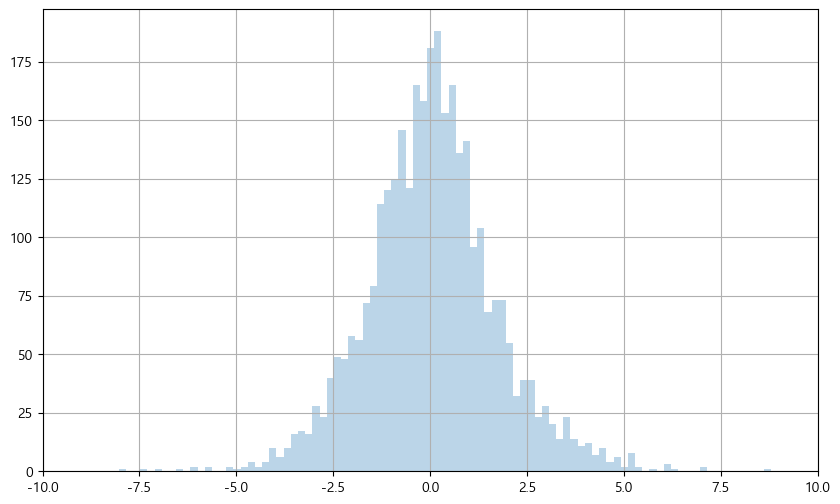

In [14]:
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(r, alpha=0.3, bins=100) 
ax.grid(True)
ax.set_xlim((-10, 10))
plt.savefig("retrun_histogram01.png", dpi=150, bbox_inches='tight')
plt.show()

In [15]:
# 정규분포와 비교

In [16]:
len(r)

3237

In [21]:
mu = r.mean()
s = r.std()

ax.set_ylim((-10, 10))

data = np.random.randn(n) * s + mu

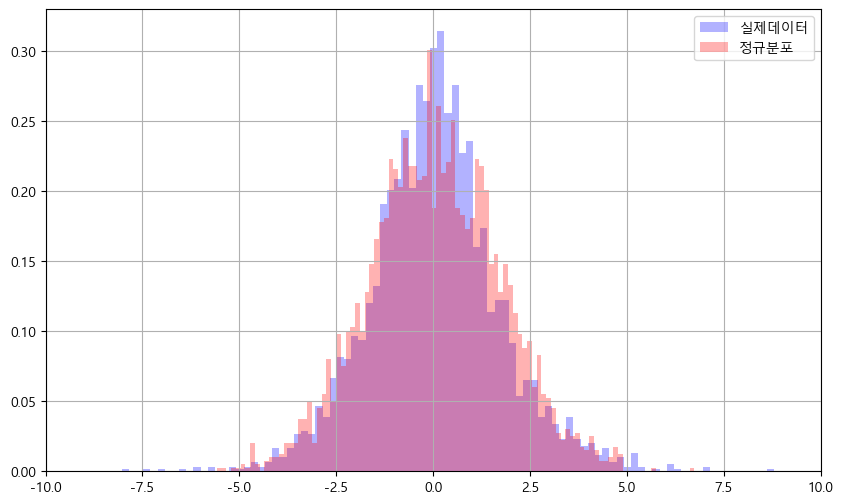

In [22]:
fig, ax = plt.subplots(figsize=(10,6))
ax.hist([r],    alpha=0.3, bins=100,density=True, color='blue', label = '실제데이터')
ax.hist([data], alpha=0.3, bins=100,density=True, color='red',label = '정규분포')
ax.set_xlim((-10, 10))
ax.grid(True)
plt.legend()
plt.savefig("retrun_histogram02.png", dpi=150, bbox_inches='tight')
plt.show()